In [1]:
pip install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
from torchvision import datasets, transforms

# Define the transformation
tensor_transform = transforms.ToTensor()

# Load the MNIST training dataset
training_dataset = datasets.MNIST(root='C:\\Users\\venka\\DeepLearning', train=True, download=True, transform=tensor_transform)

# Load the MNIST testing dataset
testing_dataset = datasets.MNIST(root='C:\\Users\\venka\\DeepLearning', train=False, download=True, transform=tensor_transform)


In [47]:
training_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\venka\DeepLearning
    Split: Train
    StandardTransform
Transform: ToTensor()

In [48]:
testing_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: C:\Users\venka\DeepLearning
    Split: Test
    StandardTransform
Transform: ToTensor()

In [49]:
from torch.utils.data import DataLoader

# Create DataLoader for the training dataset
train_loader = DataLoader(training_dataset, batch_size=10, shuffle=True)

# Create DataLoader for the testing dataset
test_loader = DataLoader(testing_dataset, batch_size=10, shuffle=False)


In [50]:
conv_layer1 = nn.Conv2d(1, 8, 3, 1)
conv_layer2 = nn.Conv2d(8, 18, 3, 1)


In [51]:
import torch.nn as nn
import torch.nn.functional as F

class ConvNetwork1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layer1 = nn.Conv2d(1, 8, 3, 1)
        self.conv_layer2 = nn.Conv2d(8, 18, 3, 1)
        self.fc_layer1 = nn.Linear(5*5*18, 18)
        self.fc_layer2 = nn.Linear(18, 10)

    def forward(self, x):
        x = F.leaky_relu(self.conv_layer1(x), negative_slope=0.01)
        x = F.max_pool2d(x, 2, 2)
        x = F.leaky_relu(self.conv_layer2(x), negative_slope=0.01)
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 5*5*18)
        x = F.leaky_relu(self.fc_layer1(x), negative_slope=0.01)
        x = self.fc_layer2(x)
        return F.softmax(x, dim=1)  


In [52]:
model1 = ConvNetwork1()
model1


ConvNetwork1(
  (conv_layer1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv_layer2): Conv2d(8, 18, kernel_size=(3, 3), stride=(1, 1))
  (fc_layer1): Linear(in_features=450, out_features=18, bias=True)
  (fc_layer2): Linear(in_features=18, out_features=10, bias=True)
)

In [53]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.001)


In [54]:
epochs = 20
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0
    
    # Training the batches
    for b, (x_train, y_train) in enumerate(train_loader):
        
        # Applying the model
        y_pred = model1(x_train)  
        loss = criterion(y_pred, y_train)
 
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Updating parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_losses.append(loss)
    train_correct.append(train_corr)
        
    # Testing the batches
    with torch.no_grad():
        for b, (x_test, y_test) in enumerate(test_loader):
            y_val = model1(x_test)

            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(test_corr)


In [55]:
train_losses = torch.tensor(train_losses)


In [56]:
conv_layer1 = nn.Conv2d(1, 6, 4, 1)
conv_layer2 = nn.Conv2d(6, 16, 4, 1)


In [57]:
import torch.nn as nn
import torch.nn.functional as F

class ConvNetwork2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layer1 = nn.Conv2d(1, 6, 4, 1)
        self.conv_layer2 = nn.Conv2d(6, 16, 4, 1)
        self.fc_layer1 = nn.Linear(4*4*16, 16)
        self.fc_layer2 = nn.Linear(16, 14)
        self.fc_layer3 = nn.Linear(14, 10)

    def forward(self, x):
        x = F.leaky_relu(self.conv_layer1(x), negative_slope=0.01)
        x = F.max_pool2d(x, 2, 2)
        x = F.leaky_relu(self.conv_layer2(x), negative_slope=0.01)
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*16)
        x = F.leaky_relu(self.fc_layer1(x), negative_slope=0.01)
        x = F.leaky_relu(self.fc_layer2(x), negative_slope=0.01)
        x = self.fc_layer3(x)
        return F.softmax(x, dim=1)  


In [58]:
model2 = ConvNetwork2()
model2


ConvNetwork2(
  (conv_layer1): Conv2d(1, 6, kernel_size=(4, 4), stride=(1, 1))
  (conv_layer2): Conv2d(6, 16, kernel_size=(4, 4), stride=(1, 1))
  (fc_layer1): Linear(in_features=256, out_features=16, bias=True)
  (fc_layer2): Linear(in_features=16, out_features=14, bias=True)
  (fc_layer3): Linear(in_features=14, out_features=10, bias=True)
)

In [59]:
criterion2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.001)


In [60]:
epochs = 20
train_losses2 = []
test_losses2 = []
train_correct2 = []
test_correct2 = []

for i in range(epochs):
    train_corr2 = 0
    test_corr2 = 0
    
    # Training the batches
    for b, (x_train, y_train) in enumerate(train_loader):
        
        # Applying the model
        y_pred2 = model2(x_train)
        loss2 = criterion2(y_pred2, y_train)
 
        predicted2 = torch.max(y_pred2.data, 1)[1]
        batch_corr2 = (predicted2 == y_train).sum()
        train_corr2 += batch_corr2
        
        # Updating parameters
        optimizer2.zero_grad()
        loss2.backward()
        optimizer2.step()
        
    train_losses2.append(loss2.item())
    train_correct2.append(train_corr2.item())
        
    # Testing the batches
    with torch.no_grad():
        for b, (x_test, y_test) in enumerate(test_loader):
            y_val = model2(x_test)
            predicted2 = torch.max(y_val.data, 1)[1]
            test_corr2 += (predicted2 == y_test).sum()
            
    test_loss2 = criterion2(y_val, y_test)
    test_losses2.append(test_loss2.item())
    test_correct2.append(test_corr2.item())


In [61]:
train_losses2 = torch.tensor(train_losses2)


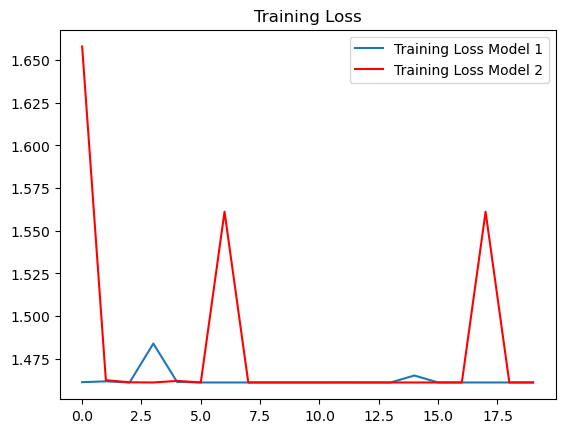

In [62]:
import matplotlib.pyplot as plt

# Plotting training loss for all models
plt.plot(train_losses.detach().numpy(), label='Training Loss Model 1')
plt.plot(train_losses2.detach().numpy(), 'r', label='Training Loss Model 2')
plt.title('Training Loss')
plt.legend()
plt.show()


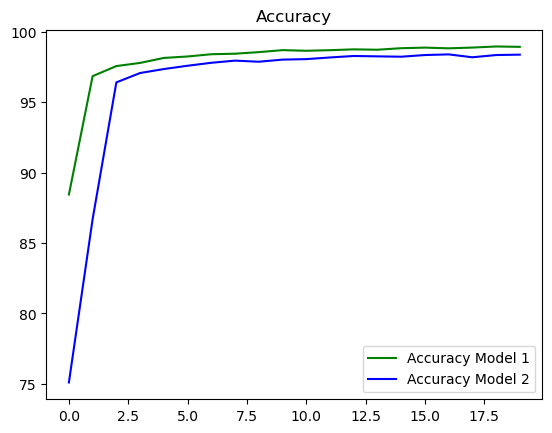

In [63]:
import matplotlib.pyplot as plt

# Plotting accuracy for all models
plt.plot([t/600 for t in train_correct], 'g', label='Accuracy Model 1')
plt.plot([t/600 for t in train_correct2], 'b', label='Accuracy Model 2')
plt.title('Accuracy')
plt.legend()
plt.show()
